# Table of convergence
We compute the integral WRT x by the neural network and the integral WRT mu with Monte-Carlo, more precisely, we compute 1/N_M * 1/(N_h+1) * sum_i sum_j (u_NN(x_j, mu_i) - u_ex(x_j, mu_i))^2


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from functions import *
from time import perf_counter

K = 2
a = -1
b = 1


PATH_SAVE = "./grid_K=2/table_convergence/NN"

N_n = 10 #number of neurons
N_HL = 2
lr = 5*1e-4

N_hs = np.array([19, 29, 39, 49, 59])
N_Ms = np.array([10, 100, 1000])
print(N_hs)
print(N_Ms)

[19 29 39 49 59]
[  10  100 1000]


N_mu = 5

In [13]:
N_mu = 5
trials = 10
err = np.zeros((len(N_hs), len(N_Ms)))
time_NN_mean=np.zeros(len(N_hs))
time_New_mean=np.zeros(len(N_hs))

for l, N_h in enumerate(N_hs):
    h = 1/(N_h + 1)
    H = np.arange(1, N_h+1)*h
    net=Net(N_HL, N_n, N_h, N_mu).double()

    PATH_model = PATH_SAVE + "/K = " + str(K) + "_model_N_h= " + str(N_h) + "_N_mu=" + str(N_mu) + '.pth'
    net.load_state_dict(torch.load(PATH_model))

    
    for k, N_M in enumerate(N_Ms):
        print("N_h = ", N_h, "h = ", h, ", N_M = ", N_M)
        integral_trials = np.zeros(trials)
        compute_time = False
        if k > len(N_Ms)-2:
            compute_time = True
            time_NN = np.zeros((trials, N_Ms[-1]))
            time_New = np.zeros((trials, N_Ms[-1]))

        for i in range(trials):
            Mus = np.random.uniform(low = -1, high = 1, size = (N_mu, N_M))
            I_Ns = np.zeros(N_M)
            for j in range(N_M):
                somme = fct(Mus[:,j], K)
                #NN sol:
                if compute_time == True:
                    time_start = perf_counter()
                y_pred = net((torch.from_numpy(Mus[:,j]))) 
                if compute_time == True:
                    time_end = perf_counter()
                    time_NN[i, j] = time_end - time_start

                #Newmark sol:
                if compute_time == True:
                    time_start = perf_counter()
                y_new, t = newmark(N_h, N_h, somme, h, h)
                if compute_time == True:
                    time_end = perf_counter()
                    time_New[i, j] = time_end - time_start

                #Exact sol: 
                uex = sol_given_fct2(somme)
                y_ex = (np.vectorize(uex))(H,t)

                #sum over x_j (except the last component)
                I_Ns[j] = h * np.sum(((y_pred.detach().numpy()-y_ex)[:-1])**2)
            #approximation of the integral:
            integral_trials[i] = np.mean(I_Ns) 
        #mean over N_trials:
        err[l, k] = np.mean(integral_trials)

    #save the mean time to compute the solutions:
    time_NN_mean[l] = np.mean(time_NN)
    time_New_mean[l] = np.mean(time_New)
    print("err : ", err[l])



N_h =  19 h =  0.05 , N_M =  10
N_h =  19 h =  0.05 , N_M =  100
N_h =  19 h =  0.05 , N_M =  1000
2
err :  [1.75615615e-07 1.64303776e-07 1.79941425e-07]
N_h =  29 h =  0.03333333333333333 , N_M =  10
N_h =  29 h =  0.03333333333333333 , N_M =  100
N_h =  29 h =  0.03333333333333333 , N_M =  1000
2
err :  [1.86865861e-07 1.98795427e-07 2.02078218e-07]
N_h =  39 h =  0.025 , N_M =  10
N_h =  39 h =  0.025 , N_M =  100
N_h =  39 h =  0.025 , N_M =  1000
2
err :  [4.32425089e-10 2.71188574e-09 3.54726531e-09]
N_h =  49 h =  0.02 , N_M =  10
N_h =  49 h =  0.02 , N_M =  100
N_h =  49 h =  0.02 , N_M =  1000
2
err :  [1.39317953e-08 1.36304730e-08 3.16260196e-08]
N_h =  59 h =  0.016666666666666666 , N_M =  10
N_h =  59 h =  0.016666666666666666 , N_M =  100
N_h =  59 h =  0.016666666666666666 , N_M =  1000
2
err :  [1.06410359e-06 1.02584412e-06 1.03565394e-06]


In [17]:
np.savetxt(PATH_SAVE + "/K = " + str(K) + "N_hs.dat", np.array(N_hs))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "N_Ms.dat", np.array(N_Ms))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat", np.array(err))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_NN_N_mu= " + str(N_mu) + ".dat", np.array(time_NN_mean))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_New_N_mu= " + str(N_mu) + ".dat", np.array(time_New_mean))

\begin{tabular}{lll}
\toprule
    h &  N\_M &    Error \\
\midrule
0.050 &   10 & 1.76E-07 \\
0.050 &  100 & 1.64E-07 \\
0.050 & 1000 & 1.80E-07 \\
0.033 &   10 & 1.87E-07 \\
0.033 &  100 & 1.99E-07 \\
0.033 & 1000 & 2.02E-07 \\
0.025 &   10 & 4.32E-10 \\
0.025 &  100 & 2.71E-09 \\
0.025 & 1000 & 3.55E-09 \\
0.020 &   10 & 1.39E-08 \\
0.020 &  100 & 1.36E-08 \\
0.020 & 1000 & 3.16E-08 \\
0.017 &   10 & 1.06E-06 \\
0.017 &  100 & 1.03E-06 \\
0.017 & 1000 & 1.04E-06 \\
\bottomrule
\end{tabular}



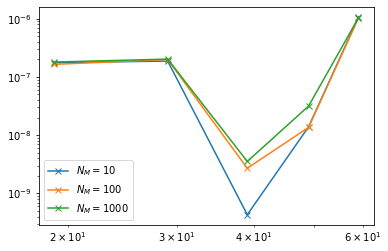

In [15]:
N_hs = np.genfromtxt(PATH_SAVE + "/K = " + str(K) +"N_hs.dat")
N_Ms = np.genfromtxt(PATH_SAVE + "/K = " + str(K) +"N_Ms.dat")
err = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat")
hs = 1/(N_hs + 1)
#create data
latex = to_latex(N_hs, N_Ms, err)
print(latex) 
legend = []

for i in range(len(N_Ms)):
    plt.plot(N_hs, err[:, i], '-x')
    plt.yscale('log')
    plt.xscale('log')
    legend.append(r"$N_M = $" +  str(int(N_Ms[i])))

plt.legend(legend)
#plt.savefig(fname="./Figures/table convergence/NN N_mu =" + str(N_mu) + " K = "+ str(K))
plt.show()

Time taken to compute the solutions

In [18]:
print(time_NN_mean)
print(time_New_mean)

[0.00025154 0.000194   0.00019335 0.00017715 0.00024158]
[0.0010298  0.00184403 0.00315801 0.00456731 0.00690866]


# We verify that the convergence is respect for different number of parameters (vary N_mu)

In [20]:
N_n = 10 #number of neurons
N_HL = 2
lr = 5*1e-4

N_hs = np.array([19, 29, 39, 49, 59])
N_Ms = np.array([10, 100, 1000])
N_mus = [10, 15, 20, 25]

trials = 10


for N_mu in N_mus:
    err = np.zeros((len(N_hs), len(N_Ms)))
    time_NN_mean=np.zeros(len(N_hs))
    time_New_mean=np.zeros(len(N_hs))

    for l, N_h in enumerate(N_hs):
        h = 1/(N_h + 1)
        H = np.arange(1, N_h+1)*h
        net=Net(N_HL, N_n, N_h, N_mu).double()

        PATH_model = PATH_SAVE + "/K = " + str(K) + "_model_N_h= " + str(N_h) + "_N_mu=" + str(N_mu) + '.pth'
        net.load_state_dict(torch.load(PATH_model))

        
        for k, N_M in enumerate(N_Ms):
            print("N_h = ", N_h, "h = ", h, ", N_M = ", N_M)
            integral_trials = np.zeros(trials)
            compute_time = False
            if k > len(N_Ms)-2:
                compute_time = True
                time_NN = np.zeros((trials, N_Ms[-1]))
                time_New = np.zeros((trials, N_Ms[-1]))

            for i in range(trials):
                Mus = np.random.uniform(low = -1, high = 1, size = (N_mu, N_M))
                I_Ns = np.zeros(N_M)
                for j in range(N_M):
                    somme = fct(Mus[:,j], K)
                    #NN sol:
                    if compute_time == True:
                        time_start = perf_counter()
                    y_pred = net((torch.from_numpy(Mus[:,j]))) 
                    if compute_time == True:
                        time_end = perf_counter()
                        time_NN[i, j] = time_end - time_start

                    #Newmark sol:
                    if compute_time == True:
                        time_start = perf_counter()
                    y_new, t = newmark(N_h, N_h, somme, h, h)
                    if compute_time == True:
                        time_end = perf_counter()
                        time_New[i, j] = time_end - time_start

                    #Exact sol: 
                    uex = sol_given_fct2(somme)
                    y_ex = (np.vectorize(uex))(H,t)

                    #sum over x_j (except the last component)
                    I_Ns[j] = h * np.sum(((y_pred.detach().numpy()-y_ex)[:-1])**2)
                #approximation of the integral:
                integral_trials[i] = np.mean(I_Ns) 
            #mean over N_trials:
            err[l, k] = np.mean(integral_trials)

        #save the mean time to compute the solutions:
        time_NN_mean[l] = np.mean(time_NN)
        time_New_mean[l] = np.mean(time_New)
        print("err : ", err[l])
    
    #save the data
    np.savetxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat", np.array(err))
    np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_NN_N_mu= " + str(N_mu) + ".dat", np.array(time_NN_mean))
    np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_New_N_mu= " + str(N_mu) + ".dat", np.array(time_New_mean))


    

N_h =  19 h =  0.05 , N_M =  10
N_h =  19 h =  0.05 , N_M =  100
N_h =  19 h =  0.05 , N_M =  1000
2
err :  [1.58322835e-05 1.56855728e-05 1.61177375e-05]
N_h =  29 h =  0.03333333333333333 , N_M =  10
N_h =  29 h =  0.03333333333333333 , N_M =  100
N_h =  29 h =  0.03333333333333333 , N_M =  1000
2
err :  [4.60953240e-05 4.43624608e-05 4.49688296e-05]
N_h =  39 h =  0.025 , N_M =  10
N_h =  39 h =  0.025 , N_M =  100
N_h =  39 h =  0.025 , N_M =  1000
2
err :  [8.70599243e-05 8.74074295e-05 8.56787598e-05]
N_h =  49 h =  0.02 , N_M =  10
N_h =  49 h =  0.02 , N_M =  100
N_h =  49 h =  0.02 , N_M =  1000
2
err :  [2.18002763e-05 1.79073974e-05 1.86796712e-05]
N_h =  59 h =  0.016666666666666666 , N_M =  10
N_h =  59 h =  0.016666666666666666 , N_M =  100
N_h =  59 h =  0.016666666666666666 , N_M =  1000
2
err :  [4.48026713e-05 4.31264830e-05 4.32298857e-05]
N_h =  19 h =  0.05 , N_M =  10
N_h =  19 h =  0.05 , N_M =  100
N_h =  19 h =  0.05 , N_M =  1000
2
err :  [7.25637960e-05 7.192

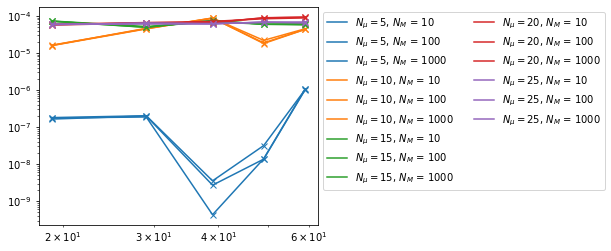

mean slopes :  [-0.22784395  0.56278805 -0.09012925  0.41025331  0.11411197]


In [29]:
N_mus = [5, 10, 15, 20, 25]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
legend = []
custom_lines = []
slopes_N_mu = np.zeros(len(N_mus))
fig = plt.figure(figsize=(5, 4))

for i, N_mu in enumerate(N_mus):
        err = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat")
        slopes = np.zeros((len(N_Ms)))
        for j in range(len(N_Ms)):
            plt.plot(N_hs, err[:, j], '-x', color = colors[i])
            slopes[j], _= np.polyfit(np.log(N_hs), np.log(err[:, j]), 1)
            legend.append(r"$N_\mu = $" +  str(N_mu)+ r", $N_M$ = " + str(int(N_Ms[j])))
            custom_lines.append(Line2D([0], [0], color=colors[i]))
        slopes_N_mu[i] = np.mean(slopes)

for i in range(2):
    legend.append("")
    custom_lines.append(Line2D([0], [0], color='w'))
    plt.plot(np.zeros(1), np.zeros([1,3]), color='w', alpha=0, label=' ')

plt.yscale('log')
plt.xscale('log')
plt.legend(custom_lines, legend, bbox_to_anchor=(1.,1.), ncol = 2)
#plt.savefig(fname="./Figures/table convergence/NN_varying_N_mu K = " + str(K))
plt.show()
print("mean slopes : ", slopes_N_mu)

# Time 

In [38]:
np.set_printoptions(precision=4, suppress = False)

for j, N_mu in enumerate(N_mus):
    time_NN_mean = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "time_NN_N_mu= " + str(N_mu) + ".dat")
    time_New_mean = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "time_New_N_mu= " + str(N_mu) + ".dat")
    print("N_mu : ", N_mu)
    print("time NN")
    print(time_NN_mean)
    print("time Newmark")
    print(time_New_mean)
    print( )

N_mu :  5
time NN
[0.0003 0.0002 0.0002 0.0002 0.0002]
time Newmark
[0.001  0.0018 0.0032 0.0046 0.0069]

N_mu :  10
time NN
[0.0003 0.0003 0.0002 0.0002 0.0002]
time Newmark
[0.0011 0.0024 0.0033 0.0047 0.0067]

N_mu :  15
time NN
[0.0002 0.0002 0.0002 0.0002 0.0002]
time Newmark
[0.0009 0.0018 0.0033 0.0048 0.0072]

N_mu :  20
time NN
[0.0002 0.0001 0.0002 0.0002 0.0002]
time Newmark
[0.0009 0.0018 0.0032 0.005  0.0069]

N_mu :  25
time NN
[0.0002 0.0002 0.0002 0.0002 0.0002]
time Newmark
[0.001  0.0019 0.0031 0.0048 0.0069]

